In [175]:
import random
def gen():
    return round(random.uniform(1,10), 2)



In [138]:
# Question
# Given a limit of no more than 8 posts in any hour block (eg: 2.1 to 3.1, 2.2 to 3.2, etc), 
# When inserting a new post into the list, what should be checked
# A) Window of new.t + 1 and new.t -1
# or
# B) For each post within new.t+1 and new.t-1, all t+1 and all t-1 of each post in that group


# Should be able to just pull all posts t+1 and t-1 and make sure that adding 1 item
# To either of those groups does not go above the limit?

In [204]:
MAX_IN_FRAME = 3

def addPost(postList, newPost):
    postsAhead = [p for p in postList if (p['t']<= newPost['t'] + 1 and p['t'] >= newPost['t'])]
    postsBack = [p for p in postList if (p['t'] >= newPost['t'] - 1 and p['t'] <= newPost['t'])]
    
    if (len(postsAhead) + 1 > 3):
        print(f"Cant add newPost: {newPost}, over limit of upper group")
        return sorted(postList, key=lambda x: x['t'])
    if (len(postsBack) + 1 > 3):
        print(f"Cant add newPost: {newPost}, over limit of lower group")
        return sorted(postList, key=lambda x: x['t'])
    
    postList.append(newPost)
    return sorted(postList, key=lambda x: x['t'])

In [205]:
def addPostMultiCheck(postList, newPost):   
    postGroup = [p for p in postList if (p['t'] >= newPost['t'] - 1 and p['t'] <= newPost['t'] + 1)]
    sortedGroup = sorted(postGroup, key=lambda x: x['t'])
    
    while len(sortedGroup) >= MAX_IN_FRAME:
        window = sortedGroup.pop(0)['t'] + 1
        if (len(list(filter(lambda p: p['t'] <= window, sortedGroup))) + 1 > MAX_IN_FRAME):
            print(f"Cant add newPost: {newPost}, over limit of group up to t: {window}")
            return sorted(postList, key=lambda x: x['t'])
    postList.append(newPost)
    return sorted(postList, key=lambda x: x['t'])

In [206]:
testGroup1 = []
testGroup2 = []

for i in range(0, 20):
    newPost = {'t': gen()}
    print(f"Adding: {newPost}")
    testGroup1 = addPost(testGroup1, newPost)
    testGroup2 = addPostMultiCheck(testGroup2, newPost)
    print("------------------------------")
    

Adding: {'t': 5.66}
------------------------------
Adding: {'t': 4.56}
------------------------------
Adding: {'t': 8.6}
------------------------------
Adding: {'t': 9.07}
------------------------------
Adding: {'t': 6.79}
------------------------------
Adding: {'t': 4.84}
------------------------------
Adding: {'t': 2.52}
------------------------------
Adding: {'t': 1.78}
------------------------------
Adding: {'t': 4.31}
------------------------------
Adding: {'t': 4.69}
------------------------------
Adding: {'t': 4.61}
Cant add newPost: {'t': 4.61}, over limit of group up to t: 5.31
------------------------------
Adding: {'t': 8.49}
------------------------------
Adding: {'t': 1.17}
------------------------------
Adding: {'t': 7.82}
------------------------------
Adding: {'t': 1.98}
------------------------------
Adding: {'t': 9.18}
Cant add newPost: {'t': 9.18}, over limit of lower group
------------------------------
Adding: {'t': 9.65}
------------------------------
Adding: {'t'

In [207]:
testGroup1

[{'t': 1.17},
 {'t': 1.42},
 {'t': 1.78},
 {'t': 1.98},
 {'t': 2.52},
 {'t': 2.82},
 {'t': 4.31},
 {'t': 4.56},
 {'t': 4.61},
 {'t': 4.69},
 {'t': 4.84},
 {'t': 5.66},
 {'t': 6.79},
 {'t': 7.82},
 {'t': 8.49},
 {'t': 8.6},
 {'t': 9.07},
 {'t': 9.65}]

In [208]:
testGroup2

[{'t': 1.17},
 {'t': 1.42},
 {'t': 1.78},
 {'t': 1.98},
 {'t': 2.52},
 {'t': 2.82},
 {'t': 4.31},
 {'t': 4.56},
 {'t': 4.69},
 {'t': 4.84},
 {'t': 5.66},
 {'t': 6.79},
 {'t': 7.82},
 {'t': 8.49},
 {'t': 8.6},
 {'t': 9.07},
 {'t': 9.18},
 {'t': 9.65}]

In [209]:
def rgb():
    return (random.random(), random.random(), random.random())

(0.0, 10.0)

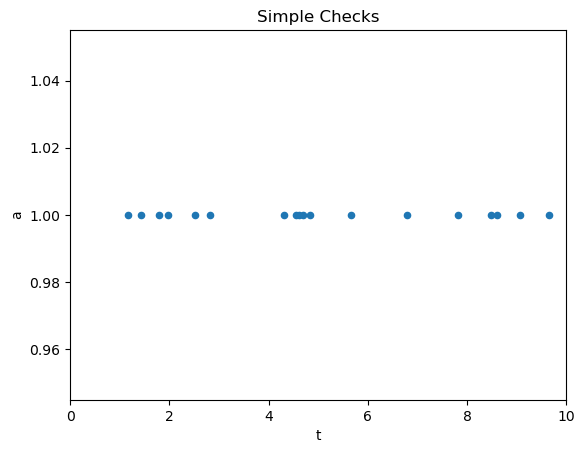

In [210]:
import pandas as pd
formatted = [{**x, 'a': 1} for x in testGroup1]
formatted
df = pd.DataFrame(data=formatted)
ax = df.plot.scatter(x='t', y='a', title='Simple Checks')
ax.set_xlim(0, 10)

In [211]:
checkPosts(testGroup1)

{'t': 1.17}
postsBack: [{'t': 1.17}]
postsAhead: [{'t': 1.17}, {'t': 1.42}, {'t': 1.78}, {'t': 1.98}]
ERROR: post {'t': 1.17} over limit of lower time frame: [{'t': 1.17}, {'t': 1.42}, {'t': 1.78}, {'t': 1.98}]
***********************
{'t': 1.42}
postsBack: [{'t': 1.17}, {'t': 1.42}]
postsAhead: [{'t': 1.42}, {'t': 1.78}, {'t': 1.98}]
***********************
{'t': 1.78}
postsBack: [{'t': 1.17}, {'t': 1.42}, {'t': 1.78}]
postsAhead: [{'t': 1.78}, {'t': 1.98}, {'t': 2.52}]
***********************
{'t': 1.98}
postsBack: [{'t': 1.17}, {'t': 1.42}, {'t': 1.78}, {'t': 1.98}]
postsAhead: [{'t': 1.98}, {'t': 2.52}, {'t': 2.82}]
ERROR: post {'t': 1.98} over limit of lower time frame: [{'t': 1.17}, {'t': 1.42}, {'t': 1.78}, {'t': 1.98}]
***********************
{'t': 2.52}
postsBack: [{'t': 1.78}, {'t': 1.98}, {'t': 2.52}]
postsAhead: [{'t': 2.52}, {'t': 2.82}]
***********************
{'t': 2.82}
postsBack: [{'t': 1.98}, {'t': 2.52}, {'t': 2.82}]
postsAhead: [{'t': 2.82}]
***********************


In [196]:
testGroup1

[{'t': 2.1},
 {'t': 2.34},
 {'t': 2.6},
 {'t': 3.26},
 {'t': 4.06},
 {'t': 4.16},
 {'t': 4.17},
 {'t': 4.75},
 {'t': 5.48},
 {'t': 5.5},
 {'t': 5.76},
 {'t': 6.78},
 {'t': 7.65},
 {'t': 9.32},
 {'t': 9.81},
 {'t': 9.92}]

(0.0, 10.0)

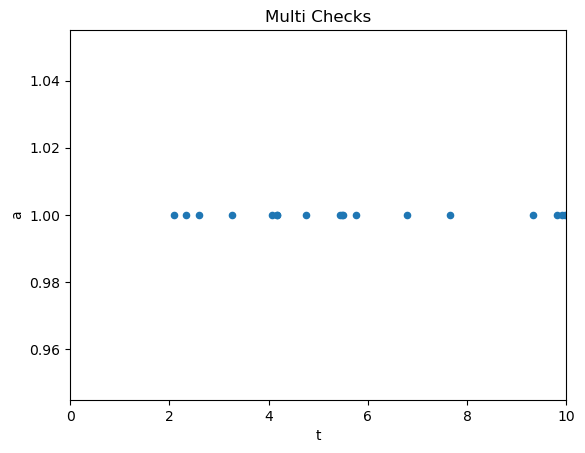

In [184]:
formatted = [{**x, 'a': 1} for x in testGroup2]
formatted
df = pd.DataFrame(data=formatted)
ax = df.plot.scatter(x='t', y='a', title='Multi Checks')
ax.set_xlim(0, 10)

In [212]:
checkPosts(testGroup2)

{'t': 1.17}
postsBack: [{'t': 1.17}]
postsAhead: [{'t': 1.17}, {'t': 1.42}, {'t': 1.78}, {'t': 1.98}]
ERROR: post {'t': 1.17} over limit of lower time frame: [{'t': 1.17}, {'t': 1.42}, {'t': 1.78}, {'t': 1.98}]
***********************
{'t': 1.42}
postsBack: [{'t': 1.17}, {'t': 1.42}]
postsAhead: [{'t': 1.42}, {'t': 1.78}, {'t': 1.98}]
***********************
{'t': 1.78}
postsBack: [{'t': 1.17}, {'t': 1.42}, {'t': 1.78}]
postsAhead: [{'t': 1.78}, {'t': 1.98}, {'t': 2.52}]
***********************
{'t': 1.98}
postsBack: [{'t': 1.17}, {'t': 1.42}, {'t': 1.78}, {'t': 1.98}]
postsAhead: [{'t': 1.98}, {'t': 2.52}, {'t': 2.82}]
ERROR: post {'t': 1.98} over limit of lower time frame: [{'t': 1.17}, {'t': 1.42}, {'t': 1.78}, {'t': 1.98}]
***********************
{'t': 2.52}
postsBack: [{'t': 1.78}, {'t': 1.98}, {'t': 2.52}]
postsAhead: [{'t': 2.52}, {'t': 2.82}]
***********************
{'t': 2.82}
postsBack: [{'t': 1.98}, {'t': 2.52}, {'t': 2.82}]
postsAhead: [{'t': 2.82}]
***********************


In [213]:

def checkPosts(posts):
    for post in posts:
        print(post)
        postsBack = [p for p in posts if (p['t'] >= post['t'] - 1 and p['t'] <= post['t'])]
        print(f"postsBack: {postsBack}")
        postsAhead = [p for p in posts if (p['t']<= post['t'] + 1 and p['t'] >= post['t'])]
        print(f"postsAhead: {postsAhead}")
        if(len(postsBack) > MAX_IN_FRAME):
            print(f"ERROR: post {post} over limit of lower time frame: {postsBack}")
        if(len(postsAhead) > MAX_IN_FRAME):
            print(f"ERROR: post {post} over limit of lower time frame: {postsAhead}")
        print("***********************")
